In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import qmc 
import functionBank as func
import os
import optimiserBank as opt
import imageio
from PIL import Image
import scienceplots
plt.style.available
plt.style.use(['science', 'notebook'])
from sklearn.preprocessing import MinMaxScaler
from pymoo.problems import get_problem
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.indicators.igd import IGD
from pymoo.util.plotting import plot
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter
from itertools import product
import functionBank

10 DE Iterations, IGD = 0.12874786763008575


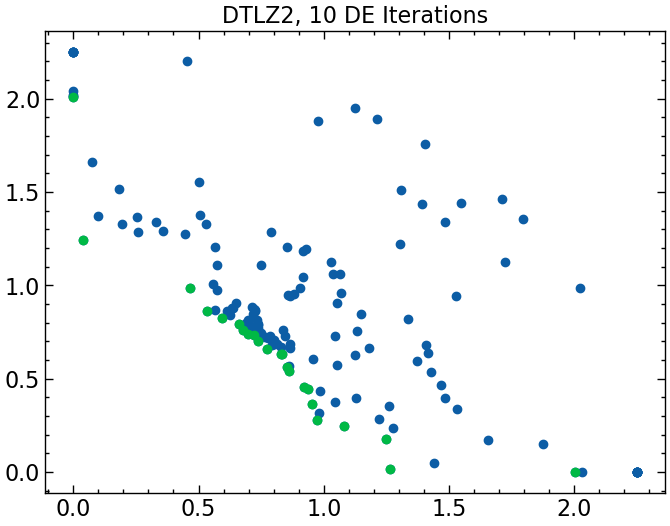

25 DE Iterations, IGD = 0.11577315235253174


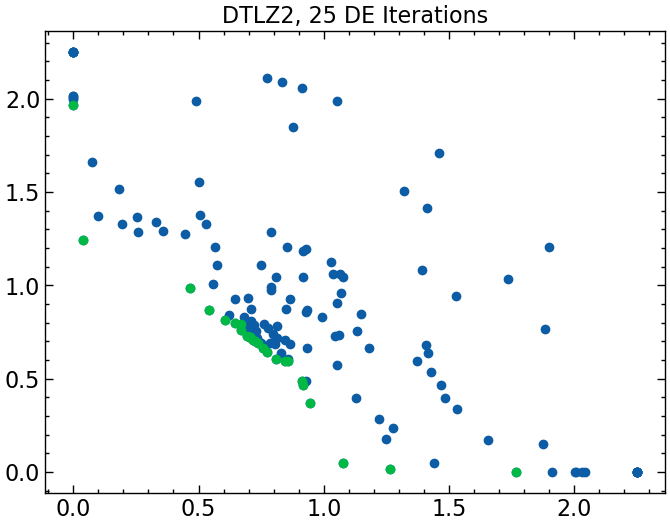

50 DE Iterations, IGD = 0.15386300650847423


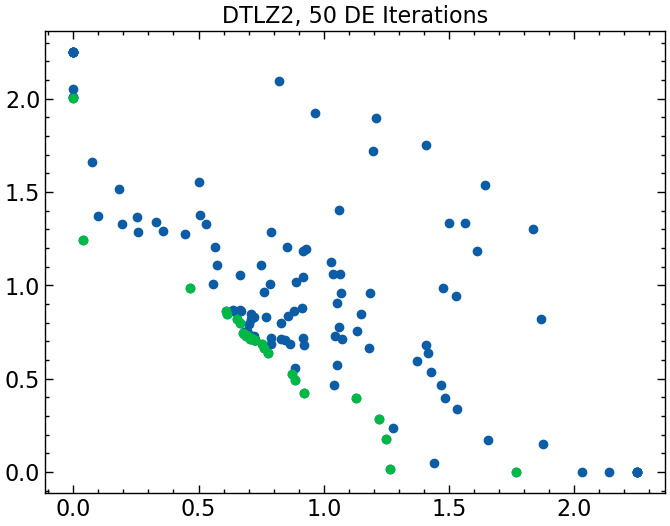

75 DE Iterations, IGD = 0.1461080988340611


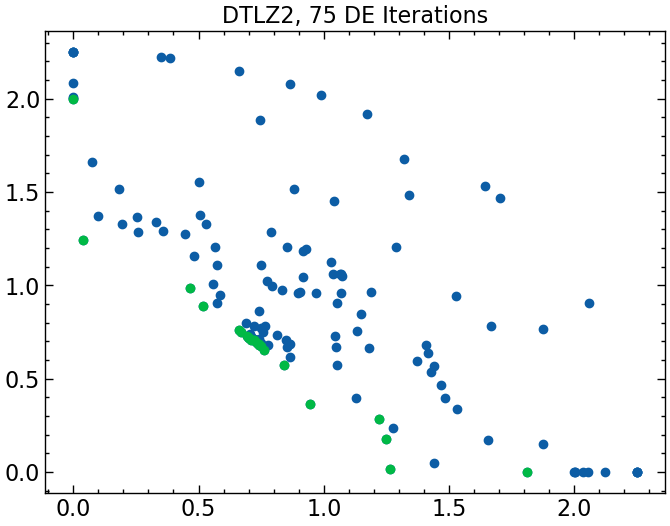

100 DE Iterations, IGD = 0.15003676897036733


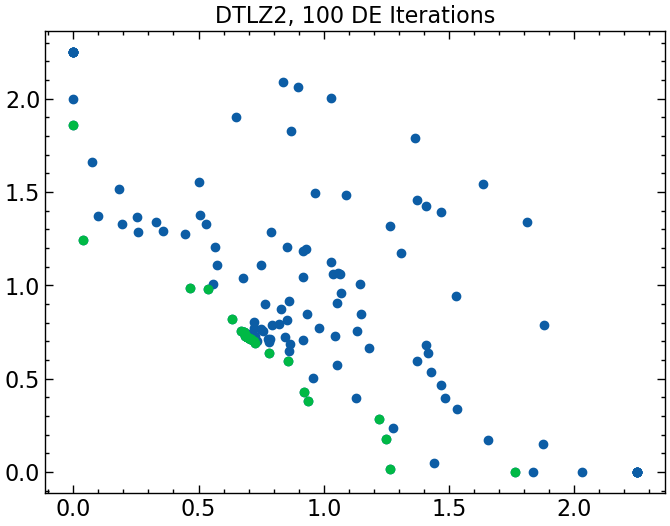

200 DE Iterations, IGD = 0.15538826506566467


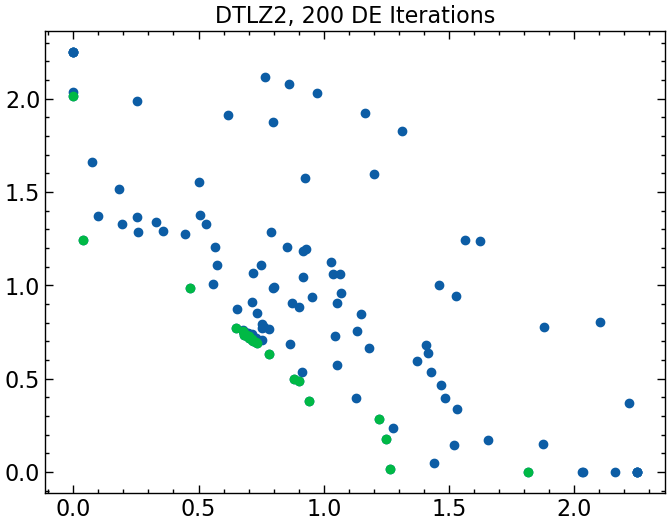

500 DE Iterations, IGD = 0.12197953360957191


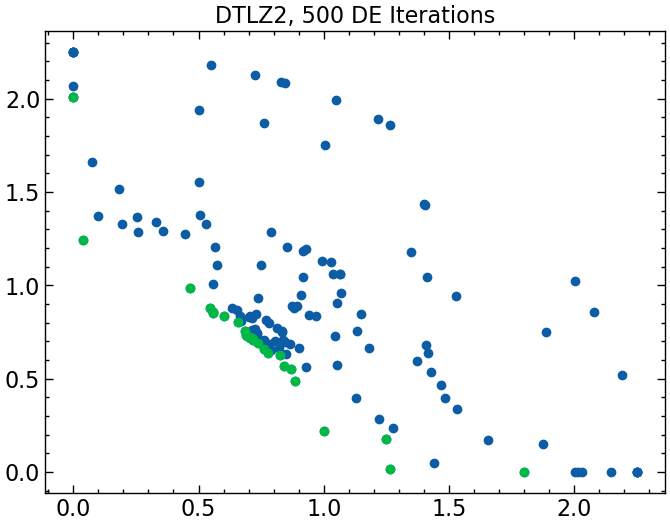

In [5]:
deIters = ['10', '25', '50', '75', '100', '200', '500']

n_obj = 2
n_var = 6

problem, bounds = functionBank.getPyMooProblem('dtlz2', n_var, n_obj)
ref_dirs = get_reference_directions("das-dennis", n_obj, n_partitions=10)
dtlz2Pareto = get_problem('dtlz2').pareto_front(ref_dirs)
ind = IGD(dtlz2Pareto)

files = glob.glob('/Users/benmoore/projects/elgarMOOOpt/deIterTest1/*')

iterDict = {}

for iterNum in deIters:
    for file in files:
        if f'BOObjtvTargetsdtlz2{iterNum}Iter.txt' not in file:
            continue
        ot = np.loadtxt(file)
        print(f'{iterNum} DE Iterations, IGD =', ind(ot))
        otPareto = func.computeParetoShells(ot)[0]
        plt.scatter(ot[:,0], ot[:,1])
        plt.scatter(otPareto[:,0], otPareto[:,1])
        plt.title(f'DTLZ2, {iterNum} DE Iterations')
        plt.show()
